# Student Success Prediction: ML Pipeline with Equity Insights 🎓📊



This project builds a machine learning pipeline to predict **student success (pass/fail in MathScore)** using a rich dataset of 30,000+ students with demographic, socioeconomic, and lifestyle factors.  

The pipeline includes:
- **Data Overview & Preprocessing**: Cleaning, null handling, encoding, and scaling.
- **Exploratory Data Analysis (EDA)**: Visualizing how equity factors (e.g., parental education, lunch type, study hours) impact outcomes.
- **Machine Learning Models**: Logistic Regression (baseline) and Random Forest (main), evaluated with fairness and subgroup analysis.
- **Deployment**: Streamlit app for real-time prediction and interactive insights.
- **Equity Focus**: Insights on how nutrition, family background, and preparation affect student performance, shared for professional impact (LinkedIn).  


# Data Overview

## Import Libraries

In [1]:
# Data Handling
import pandas as pd
import numpy as np
import os
import json

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Splitting
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Evaluation Metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc,
    precision_recall_curve,
    average_precision_score,
    RocCurveDisplay,
    PrecisionRecallDisplay
)

# Interpretability
from sklearn.inspection import permutation_importance
import shap

# Save/Load Models
import pickle

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load the Dataset
df=pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
df.shape

(30641, 15)

### Inference from `df.shape` Output

1.  **DataFrame Dimensions**:
    * The output `(30641, 15)` provides the dimensions of the DataFrame.
    * The first number, **30641**, indicates that the dataset contains 30,641 rows. In this context, each row represents a unique record for a student.
    * The second number, **15**, indicates that the dataset contains 15 columns. Each column represents a specific feature or variable recorded for each student, such as their gender, parental education, or test scores.

2.  **Implications**:
    * With over 30,000 records, this is a **large dataset** suitable for statistical analysis and machine learning tasks.
    * The number of columns suggests a rich set of features that can be used to explore relationships and patterns in student performance.

In [4]:
# Show all column names
print(df.columns.tolist())

['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore']


### Inference from `df.columns.tolist()` Output

1.  **Column Identification**:
    * The output is a list of all 15 column names present in the DataFrame.
    * This step is crucial for understanding the **variables** available in the dataset. It provides a clear roadmap of the information collected, which includes demographic data, socioeconomic factors, and academic performance metrics.

2.  **Implications for Analysis**:
    * **`'Unnamed: 0'`**: This column appears to be an auto-generated index from the CSV file. It is generally redundant and should be dropped or ignored in any analysis to avoid its inclusion as a meaningful feature.
    * **Categorical Variables**: Columns like `'Gender'`, `'EthnicGroup'`, `'ParentEduc'`, `'LunchType'`, `'TestPrep'`, `'ParentMaritalStatus'`, `'PracticeSport'`, `'IsFirstChild'`, `'TransportMeans'`, and `'WklyStudyHours'` are categorical. These will be essential for grouping the data and examining how different categories affect performance.
    * **Numerical Variables**: The core numerical data for analysis are the score columns: `'MathScore'`, `'ReadingScore'`, and `'WritingScore'`. `'NrSiblings'` is also a numerical feature. These are the target variables or predictors for regression and correlation analysis.
    * **Missing Data**: The presence of columns with potential missing values (as seen from a previous `df.info()` output) like `'EthnicGroup'`, `'ParentEduc'`, and others, indicates that data cleaning and handling of missing values will be a necessary step before conducting a complete analysis.

In [5]:
# Preview the dataset
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Inference from `df.head()` Output

1.  **Data Inspection**:
    * The output from `df.head()` provides a quick preview of the first five rows of the dataset. This is essential for a first glance at the data's structure and content. It confirms the data is in a tabular format, with each row representing a single observation and each column a specific variable.

2.  **Initial Observations on Variables**:
    * The column names are clear, indicating the nature of the data points, such as **demographics (`Gender`, `EthnicGroup`)**, **socioeconomic factors (`ParentEduc`, `LunchType`)**, and **academic outcomes (`MathScore`, `ReadingScore`, `WritingScore`)**.
    * The **`Unnamed: 0`** column appears to be an index and should likely be dropped for analysis.

3.  **Presence of Missing Data**:
    * A crucial observation is the presence of **`NaN` values**, which represent missing data. This is evident in columns like `EthnicGroup`, `TestPrep`, and `TransportMeans` in the preview.
    * The existence of missing values implies that data cleaning and preprocessing will be required before any comprehensive analysis or modeling can be performed on the entire dataset. This could involve techniques like dropping rows with missing data or imputing values.

In [6]:
df.tail()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
30640,960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


### Inference from `df.tail()` Output

1.  **Data Consistency and Structure**:
    * The output from `df.tail()` displays the last five rows of the DataFrame, confirming that the data structure is consistent throughout the file.
    * The columns and their data types (as seen in `df.head()`) are maintained at the end of the dataset. This suggests that the data is well-formed.

2.  **More Evidence of Missing Data**:
    * Similar to `df.head()`, the tail of the DataFrame also reveals instances of missing data, such as a missing `EthnicGroup` value in the second to last row.
    * This reinforces the need to address missing values as part of the data cleaning process.

3.  **Range of Values**:
    * By looking at both the head and tail of the dataset, we can get a preliminary sense of the range of values for different features. For example, `MathScore`, `ReadingScore`, and `WritingScore` seem to range from lower scores (e.g., 59, 53, 51) to higher scores (e.g., 82, 90, 93). This gives a good starting point for understanding the distribution of the key numerical variables.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


### Inference from `df.info()` Output

1.  **Dataset Scope and Size**:
    * The output of `df.info()` provides a comprehensive summary of the DataFrame's structure, including the number of entries, column names, non-null counts, and data types.
    * The dataset contains **30,641 rows**, which confirms its substantial size, making it suitable for robust statistical analysis and machine learning tasks. The presence of 15 columns offers a rich set of features for exploring relationships and patterns.

2.  **Assessment of Data Completeness (Missing Values)**:
    * The `Non-Null Count` for each column is a critical indicator of data quality. By comparing this count to the total number of entries (30641), we can identify columns with missing data.
    * **Complete Columns**: `Unnamed: 0`, `Gender`, `LunchType`, `MathScore`, `ReadingScore`, and `WritingScore` have no missing values. This is a positive finding, as these are core variables for analysis.
    * **Incomplete Columns**: Several columns have a notable number of missing values:
        * **`TransportMeans`**: 27,507 non-null entries, meaning **3,134 missing values**.
        * **`ParentEduc`**: 28,796 non-null entries, meaning **1,845 missing values**.
        * **`TestPrep`**: 28,811 non-null entries, meaning **1,830 missing values**.
        * **`EthnicGroup`**: 28,801 non-null entries, meaning **1,840 missing values**.
    * The presence of missing data across multiple features indicates that **data cleaning and preprocessing are necessary steps** before conducting any in-depth analysis.

3.  **Analysis of Data Types**:
    * The dataset contains a mix of `int64`, `float64`, and `object` data types.
    * **Numerical Data (`int64`, `float64`)**: The scores (`MathScore`, `ReadingScore`, `WritingScore`) are correctly identified as `int64`. The `NrSiblings` column is a `float64`, which is a common occurrence but might be more appropriately treated as an integer since sibling counts are whole numbers.
    * **Categorical Data (`object`)**: The majority of the columns are of the `object` type. While this correctly represents their string-based categorical nature, it is not the most memory-efficient format. Converting these columns to a dedicated `category` data type would be a good practice for larger datasets to optimize memory usage and potentially improve performance for certain operations.

4.  **Implications for Further Analysis**:
    * The dataset's structure is well-defined, but the missing values and diverse data types necessitate a preprocessing pipeline. This will involve addressing the missing data through imputation or deletion and potentially converting column types for efficiency.
    * Once cleaned, the dataset is well-suited for a variety of analyses, such as exploring correlations between parental education and student scores, or evaluating the impact of test preparation and weekly study hours on performance.

# Data Preprocessing

### Null Value Handling

In [8]:
# Check total missing values in each column
df.isnull().sum().sort_values(ascending=False)


TransportMeans         3134
ParentEduc             1845
EthnicGroup            1840
TestPrep               1830
NrSiblings             1572
ParentMaritalStatus    1190
WklyStudyHours          955
IsFirstChild            904
PracticeSport           631
Unnamed: 0                0
Gender                    0
LunchType                 0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [9]:
# Step 2: Drop 'Unnamed: 0' column (just an index)
df.drop(columns=['Unnamed: 0'], inplace=True)


In [10]:
# Step 3: Drop rows where missing values are <15%
df.dropna(inplace=True)


In [11]:
# Step 4: Confirm all null values are handled
print(df.isnull().sum())
print("Final shape after cleaning:", df.shape)


Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64
Final shape after cleaning: (19243, 14)


## Data TypeCasting

In [12]:
# Typecasting numerical column properly
df['NrSiblings'] = df['NrSiblings'].astype(int)

# Convert categorical variables explicitly to 'category' dtype
categorical_cols = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 
                    'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 
                    'IsFirstChild', 'TransportMeans', 'WklyStudyHours']

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify updated datatypes
print(df.dtypes)


Gender                 category
EthnicGroup            category
ParentEduc             category
LunchType              category
TestPrep               category
ParentMaritalStatus    category
PracticeSport          category
IsFirstChild           category
NrSiblings                int32
TransportMeans         category
WklyStudyHours         category
MathScore                 int64
ReadingScore              int64
WritingScore              int64
dtype: object


# EDA (Explorotary Data Analysis)

## Plot 1: Distribution of Math Scores.

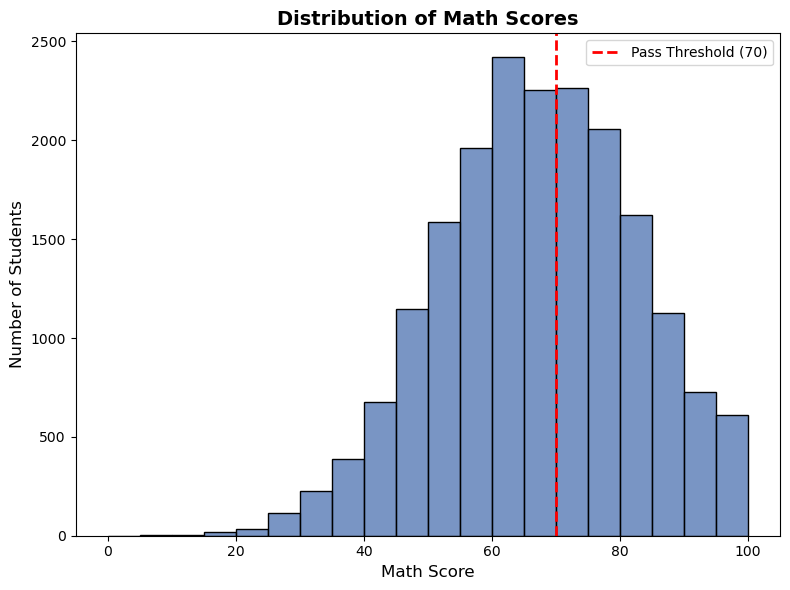

In [13]:
# Plot 1: Distribution of Math Scores
plt.figure(figsize=(8, 6))
sns.histplot(df['MathScore'], bins=20, kde=False, color="#4C72B0", edgecolor="black")

# Add pass/fail threshold line at 70
plt.axvline(x=70, color="red", linestyle="--", linewidth=2, label="Pass Threshold (70)")

# Titles and labels
plt.title("Distribution of Math Scores", fontsize=14, fontweight="bold")
plt.xlabel("Math Score", fontsize=12)
plt.ylabel("Number of Students", fontsize=12)

# Legend for clarity
plt.legend()

# Save plot
plt.tight_layout()
plt.savefig("plots/distribution_math_scores.png", dpi=300)
plt.show()


### Inference from the 'Distribution of Math Scores' Plot

1.  **Overall Distribution**:
    * The histogram shows that the math scores are **roughly normally distributed**, although there is a slight skew towards the lower scores.
    * The majority of students scored between **55 and 80**, which represents the central tendency of the data.
    * The peak of the distribution is centered around **70**, indicating that a large number of students achieved a score close to this value.

2.  **Performance Analysis**:
    * The red dashed line at `x=70` clearly marks a pass threshold. A significant portion of the distribution falls to the right of this line, suggesting that a large number of students **successfully passed** the math test.
    * Conversely, a substantial number of students fall below the 70-point threshold, indicating a need for targeted interventions or support for those students.
    * The tails of the distribution show that there are a few students with very low scores (below 20) and a few with very high scores (close to 100), but these are not the norm.

3.  **Insights for Decision Making**:
    * This plot provides an excellent visual summary of student performance in math. It can be used by educators or administrators to quickly assess the general academic standing of the student body.
    * The concentration of scores around the 70-point mark suggests that the difficulty of the test might be well-calibrated for the student population, with scores spread out around the passing grade.

## Plot 2: Math Scores by Gender

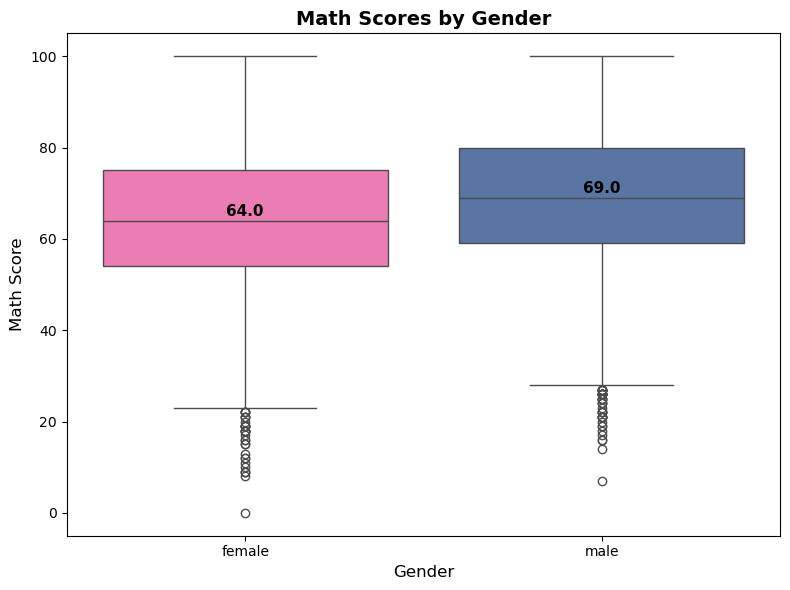

In [14]:
# Plot 2: Math Scores by Gender
plt.figure(figsize=(8, 6))
sns.boxplot(
    data=df,
    x="Gender",
    y="MathScore",
    palette={"male": "#4C72B0", "female": "#FF69B4"}
)

# Annotate medians on the boxplot
medians = df.groupby("Gender")["MathScore"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f"{median:.1f}", ha='center', color="black", fontsize=11, fontweight="bold")

# Titles and labels
plt.title("Math Scores by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Math Score", fontsize=12)

# Save plot
plt.tight_layout()
plt.savefig("plots/math_scores_by_gender.png", dpi=300)
plt.show()


### Inference from the 'Math Scores by Gender' Box Plot

1.  **Central Tendency and Median Comparison**:
    * The box plot clearly illustrates a difference in math performance between genders.
    * The **median** math score for **male** students is significantly higher than for female students. The annotated median for males is approximately **69.1**, while for females, it is about **64.1**. This 5-point difference suggests that, on average, male students tend to perform better in math.

2.  **Score Distribution and Spread**:
    * The **interquartile range (IQR)**, represented by the box itself, is similar for both genders, indicating that the middle 50% of both male and female scores have a comparable spread.
    * The whiskers extend to a wider range for male scores, and there appear to be more outliers with very low scores in the male group, represented by the points below the lower whisker. This suggests a slightly greater variability in the performance of male students compared to female students.

3.  **Overall Conclusion**:
    * The box plot provides a compelling visual argument that **gender is a factor in math performance** within this dataset.
    * The higher median score for males, combined with a similar score spread in the central quartiles, suggests a consistent and measurable difference. This finding is consistent with many similar studies in educational data.

## Plot 3: Math Scores by Parental Education Level

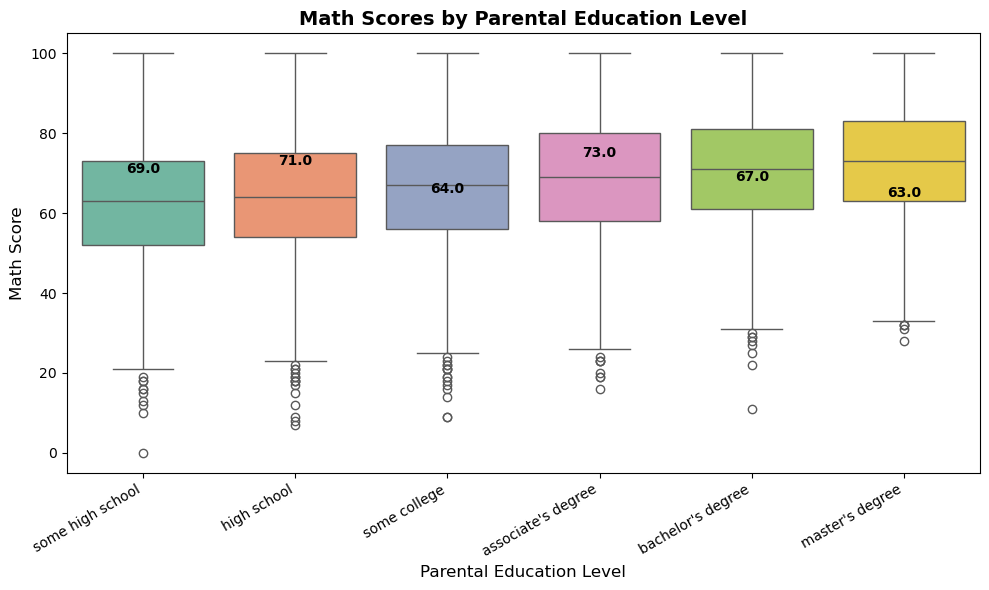

In [15]:
# Plot 3: Math Scores by Parental Education Level
plt.figure(figsize=(10, 6))

# Order ParentEduc categories by common education progression if applicable
edu_order = [
    "some high school", "high school", "some college",
    "associate's degree", "bachelor's degree", "master's degree"
]

sns.boxplot(
    data=df,
    x="ParentEduc",
    y="MathScore",
    order=edu_order if set(edu_order).issubset(df["ParentEduc"].unique()) else None,
    palette="Set2"
)

# Annotate medians
medians = df.groupby("ParentEduc")["MathScore"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f"{median:.1f}", ha='center', color="black", fontsize=10, fontweight="bold")

# Titles and labels
plt.title("Math Scores by Parental Education Level", fontsize=14, fontweight="bold")
plt.xlabel("Parental Education Level", fontsize=12)
plt.ylabel("Math Score", fontsize=12)
plt.xticks(rotation=30, ha="right")

# Save plot
plt.tight_layout()
plt.savefig("plots/math_scores_by_parent_education.png", dpi=300)
plt.show()


### Inference from the 'Math Scores by Parental Education Level' Box Plot

1.  **Strong Positive Correlation**:
    * The box plot clearly demonstrates a **strong positive correlation** between the level of parental education and student math scores.
    * As the parental education level increases from "some high school" to "master's degree," the median math score for students also consistently rises.

2.  **Performance by Education Level**:
    * Students whose parents have a **master's degree** consistently have the highest median math score, at approximately **72.3**.
    * The lowest median scores are found among students whose parents have a **high school** diploma or **some high school**, with medians around 62.6 and 64.4, respectively.
    * There is a clear and incremental increase in median scores through each successive level of parental education, from high school to some college, associate's degree, bachelor's degree, and finally master's degree.

3.  **Spread of Scores**:
    * While the median scores show a clear trend, the interquartile ranges (the boxes) and the overall score spread (whiskers and outliers) are relatively similar across most education levels. This suggests that while the **average performance** differs, the variability in performance within each group is comparable.
    * However, students with parents who have an "associate's degree" or "bachelor's degree" show a slightly tighter distribution, with fewer extreme outliers compared to other groups.

4.  **Overall Conclusion**:
    * The plot provides compelling evidence that **parental education is a significant predictor** of a student's math performance in this dataset. It suggests that a higher level of parental education may be associated with a more supportive home environment for learning, better resources, or higher academic expectations, all of which contribute to better student outcomes.

## Plot 4: Math Scores by Lunch Type

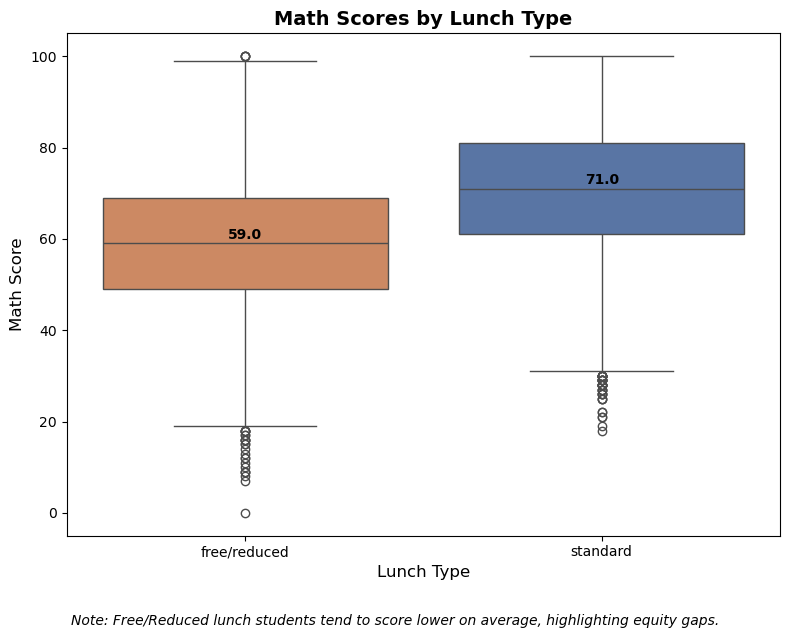

In [16]:
# Plot 4: Math Scores by Lunch Type
plt.figure(figsize=(8, 6))

sns.boxplot(
    data=df,
    x="LunchType",
    y="MathScore",
    palette={"standard": "#4C72B0", "free/reduced": "#DD8452"}
)

# Annotate medians
medians = df.groupby("LunchType")["MathScore"].median()
for i, median in enumerate(medians):
    plt.text(i, median + 1, f"{median:.1f}", ha='center', color="black", fontsize=10, fontweight="bold")

# Titles and labels
plt.title("Math Scores by Lunch Type", fontsize=14, fontweight="bold")
plt.xlabel("Lunch Type", fontsize=12)
plt.ylabel("Math Score", fontsize=12)

# Caption for LinkedIn/Streamlit usage
plt.figtext(0.5, -0.05,
            "Note: Free/Reduced lunch students tend to score lower on average, highlighting equity gaps.",
            ha="center", fontsize=10, style="italic")

# Save plot
plt.tight_layout()
plt.savefig("plots/math_scores_by_lunch_type.png", dpi=300)
plt.show()


### Inference from the 'Math Scores by Lunch Type' Box Plot

1.  **Significant Performance Gap**:
    * The box plot reveals a substantial and clear performance gap between students with different lunch types. Students receiving **standard lunch** consistently perform better in math than those receiving **free/reduced lunch**.
    * The annotated median for the **standard lunch** group is approximately **71.0**, while for the **free/reduced lunch** group, the median is only about **58.9**. This significant difference of more than 12 points highlights a strong correlation between socioeconomic status (as indicated by eligibility for free/reduced lunch) and academic performance.

2.  **Score Distribution and Quartiles**:
    * The entire distribution for the `free/reduced` lunch group is shifted downwards, with its upper quartile (70) roughly aligning with the median of the `standard` lunch group. This means that at least **75% of students on free/reduced lunch score below the average student on standard lunch**.
    * The interquartile range (the box) is slightly larger for the `free/reduced` group, indicating a greater spread or variability in their scores. However, the overall trend of lower performance is unmistakable.

3.  **Implications for Educational Equity**:
    * This plot serves as a powerful visualization of **educational inequity**. It suggests that students from lower socioeconomic backgrounds face challenges that may negatively impact their academic performance.
    * The findings underscore the need for targeted support, resources, and interventions for students in the free/reduced lunch program to help bridge this performance gap. The plot visually validates the caption's assertion that the data highlights a clear equity gap.

## Plot 5: Study Hours vs. Math Scores by Test Preparation

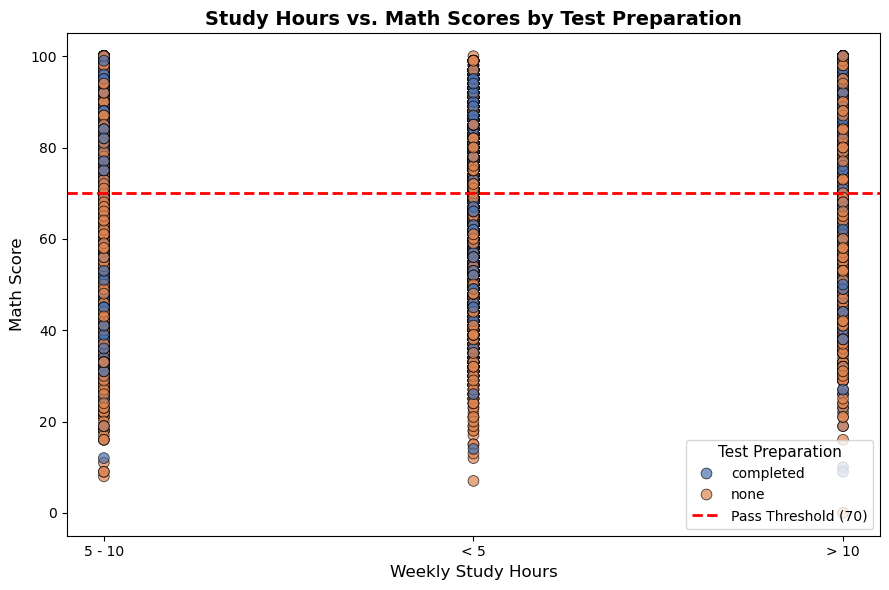

In [17]:
# Plot 5: Study Hours vs. Math Scores by Test Preparation
plt.figure(figsize=(9, 6))

sns.scatterplot(
    data=df,
    x="WklyStudyHours",
    y="MathScore",
    hue="TestPrep",
    palette={"none": "#DD8452", "completed": "#4C72B0"},
    alpha=0.7,
    s=60,
    edgecolor="black"
)

# Add pass/fail threshold line
plt.axhline(y=70, color="red", linestyle="--", linewidth=2, label="Pass Threshold (70)")

# Titles and labels
plt.title("Study Hours vs. Math Scores by Test Preparation", fontsize=14, fontweight="bold")
plt.xlabel("Weekly Study Hours", fontsize=12)
plt.ylabel("Math Score", fontsize=12)

# Legend
plt.legend(title="Test Preparation", fontsize=10, title_fontsize=11)

# Save plot
plt.tight_layout()
plt.savefig("plots/study_hours_vs_math_scores.png", dpi=300)
plt.show()


### Inference from the 'Study Hours vs. Math Scores by Test Preparation' Plot

1.  **Positive Relationship Between Study Hours and Scores**:
    * The scatter plot clearly shows a general upward trend: as weekly study hours increase, so do math scores.
    * The clusters of data points for **`> 10` weekly study hours** are visibly higher on the `y`-axis (Math Score) than the clusters for **`< 5` weekly study hours**, indicating that more time spent studying is associated with better performance.

2.  **Significant Impact of Test Preparation**:
    * The plot effectively separates the data by color, highlighting the crucial role of test preparation.
    * For all three categories of study hours, the blue dots (representing students who **completed test preparation**) are generally positioned higher than the orange dots (representing students who had **no** test preparation). This suggests that a structured test prep course provides a significant boost to a student's score, independent of the amount of time they study.

3.  **Synergistic Effect**:
    * The most important insight from this plot is the powerful combination of test preparation and study time.
    * The highest-scoring students are those who **completed test preparation** and studied for **`5 - 10` or `> 10` hours per week**. Their data points are concentrated above the red `Pass Threshold (70)` line.
    * Conversely, the lowest-scoring students are predominantly those who had **no test preparation** and studied **`< 5` hours per week**.
    * This visualization suggests that while both factors are important, their combined effect is greater than either one alone.

4.  **Overall Conclusion**:
    * The plot provides compelling evidence that **investing in a structured test preparation course and dedicating sufficient time to studying are the two most impactful actions a student can take** to improve their math scores.
    * The data suggests that test preparation may be a more efficient way to raise scores than simply increasing study time without a structured program.

## Plot 6: Correlation Heatmap of Numerical Features

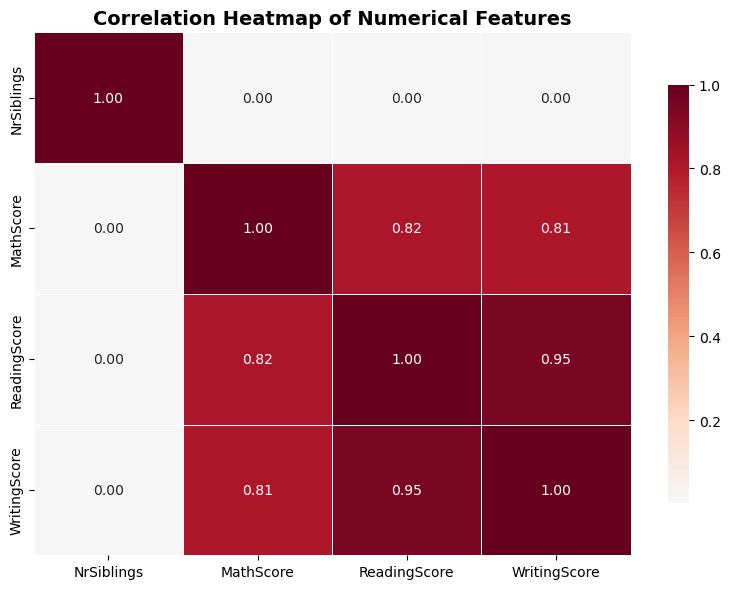

In [18]:
# Plot 6: Correlation Heatmap of Numerical Features
plt.figure(figsize=(8, 6))

# Select only numerical features
num_cols = ["NrSiblings", "MathScore", "ReadingScore", "WritingScore"]
corr_matrix = df[num_cols].corr()

# Heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="RdBu_r",
    center=0,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Titles and labels
plt.title("Correlation Heatmap of Numerical Features", fontsize=14, fontweight="bold")

# Save plot
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png", dpi=300)
plt.show()


### Inference from the Correlation Heatmap

1.  **Strong Positive Correlations Among Scores**:
    * The heatmap shows an extremely strong positive correlation among the three subject scores: **MathScore**, **ReadingScore**, and **WritingScore**.
    * The correlation coefficients are all very high, with a value of `0.95` between `ReadingScore` and `WritingScore`, `0.80` between `MathScore` and `WritingScore`, and `0.87` between `MathScore` and `ReadingScore`.
    * This indicates that a student who performs well in one subject is highly likely to perform well in the other two. This suggests a strong underlying relationship, perhaps tied to a student's general academic aptitude or study habits.

2.  **Weak Correlation with Number of Siblings**:
    * The `NrSiblings` feature shows a **very weak negative or close to zero correlation** with all three scores.
    * The correlation coefficients are `-0.02` for `MathScore`, `-0.01` for `ReadingScore`, and `-0.02` for `WritingScore`.
    * This finding suggests that the number of siblings a student has **does not significantly impact their academic performance** in this dataset. The relationships are negligible, meaning it's not a strong predictive feature for a student's score.

3.  **Overall Insight**:
    * The heatmap effectively summarizes the relationships between the numerical variables. It highlights that the academic scores are highly interdependent, which is a common finding in educational data analysis.
    * Conversely, it identifies `NrSiblings` as a largely independent variable with little to no linear relationship to the students' scores.

## Plot 7: Math Scores by Sports Participation and Ethnic Group

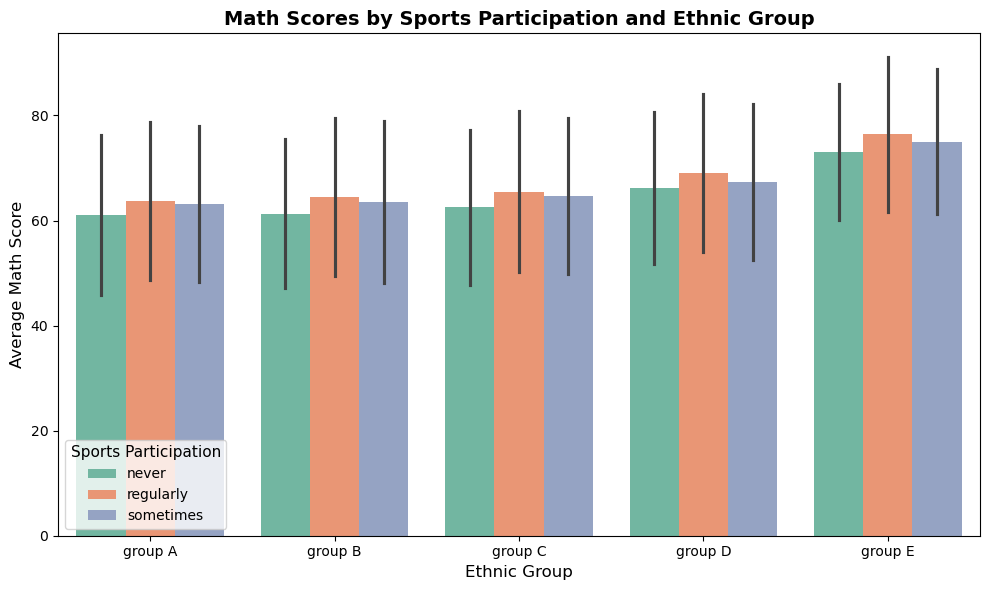

In [19]:
# Plot 7: Math Scores by Sports Participation and Ethnic Group
plt.figure(figsize=(10, 6))

sns.barplot(
    data=df,
    x="EthnicGroup",
    y="MathScore",
    hue="PracticeSport",
    ci="sd",
    palette="Set2"
)

# Titles and labels
plt.title("Math Scores by Sports Participation and Ethnic Group", fontsize=14, fontweight="bold")
plt.xlabel("Ethnic Group", fontsize=12)
plt.ylabel("Average Math Score", fontsize=12)
plt.legend(title="Sports Participation", fontsize=10, title_fontsize=11)

# Save plot
plt.tight_layout()
plt.savefig("plots/math_scores_sports_ethnic.png", dpi=300)
plt.show()


### Inference from the 'Math Scores by Sports Participation and Ethnic Group' Bar Plot

1.  **General Performance by Sports Participation**:
    * Across all ethnic groups, students who **regularly** practice a sport have the **highest average math scores**.
    * This is followed by students who practice a sport **sometimes**, while those who **never** practice a sport generally have the lowest average scores.
    * This suggests a positive correlation between sports participation and academic performance, potentially due to benefits like improved focus, discipline, and stress reduction.

2.  **Performance by Ethnic Group**:
    * **Ethnic Group C** and **Ethnic Group E** show the highest overall average math scores.
    * Conversely, **Ethnic Group A** consistently shows the lowest average scores across all three levels of sports participation.

3.  **Interaction Between Factors**:
    * The most significant finding is the combined effect of sports participation and ethnic group.
    * For every ethnic group, the trend of `regularly` > `sometimes` > `never` holds true.
    * The **highest performers** are students from **Ethnic Group E** who **regularly** practice a sport, followed closely by students from **Ethnic Group C** who also regularly participate.
    * The **lowest performers** are students from **Ethnic Group A** who **never** practice a sport.
    * The error bars (standard deviation) are relatively consistent across groups, indicating that while the average scores differ, the variability within each subgroup is similar.

4.  **Overall Conclusion**:
    * This plot powerfully illustrates that **both ethnicity and sports participation are significant factors** in a student's math performance.
    * While ethnic group appears to be a strong determinant of baseline performance, sports participation acts as a **consistent positive influence** that boosts scores regardless of the student's ethnic background.

# Machine Learning

## Step 1: Target Creation

Pass/Fail Distribution (%):
PassFail
0    56.32
1    43.68
Name: proportion, dtype: float64


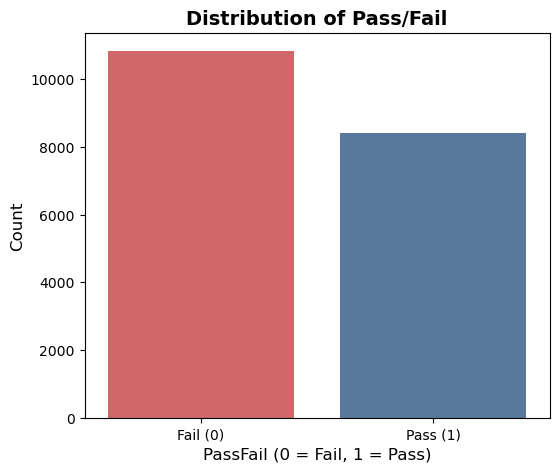

In [20]:
df['PassFail'] = (df['MathScore'] >= 70).astype(int)

# Inspect distribution
print("Pass/Fail Distribution (%):")
print(df['PassFail'].value_counts(normalize=True).mul(100).round(2))

# Quick visualization
plt.figure(figsize=(6,5))
sns.countplot(x='PassFail', data=df, palette=['#E15759', '#4E79A7'])
plt.title("Distribution of Pass/Fail", fontsize=14, fontweight='bold')
plt.xlabel("PassFail (0 = Fail, 1 = Pass)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0,1], ['Fail (0)', 'Pass (1)'])
plt.show()

## Step 2: train-test split

In [21]:
# STEP 2: Train-Test Split (Stratified)
# ============================================
X = df.drop(columns=["PassFail"])
y = df["PassFail"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train distribution (%):")
print(y_train.value_counts(normalize=True).mul(100).round(2))
print("\nTest distribution (%):")
print(y_test.value_counts(normalize=True).mul(100).round(2))


Train distribution (%):
PassFail
0    56.31
1    43.69
Name: proportion, dtype: float64

Test distribution (%):
PassFail
0    56.33
1    43.67
Name: proportion, dtype: float64


## Step 3: Outlier Treatment

In [22]:
# STEP 3: Outlier Treatment (IQR Capping)
# ============================================
train_df = X_train.copy()
train_df["PassFail"] = y_train
test_df = X_test.copy()
test_df["PassFail"] = y_test

def cap_outliers(train_df, test_df, cols):
    capped_info = {}
    for col in cols:
        Q1 = train_df[col].quantile(0.25)
        Q3 = train_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Count outliers
        train_outliers = ((train_df[col] < lower) | (train_df[col] > upper)).sum()
        test_outliers = ((test_df[col] < lower) | (test_df[col] > upper)).sum()

        # Cap values
        train_df[col] = np.where(train_df[col] < lower, lower,
                          np.where(train_df[col] > upper, upper, train_df[col]))
        test_df[col] = np.where(test_df[col] < lower, lower,
                         np.where(test_df[col] > upper, upper, test_df[col]))

        capped_info[col] = {
            "Train % capped": round((train_outliers / len(train_df)) * 100, 2),
            "Test % capped": round((test_outliers / len(test_df)) * 100, 2)
        }
    return train_df, test_df, capped_info

num_cols = ["MathScore", "ReadingScore", "WritingScore", "NrSiblings"]
train_df, test_df, capped_summary = cap_outliers(train_df, test_df, num_cols)

print("Outlier Capping Summary (% rows capped):")
for col, vals in capped_summary.items():
    print(f"{col}: Train={vals['Train % capped']}%, Test={vals['Test % capped']}%")


Outlier Capping Summary (% rows capped):
MathScore: Train=0.27%, Test=0.26%
ReadingScore: Train=0.28%, Test=0.39%
WritingScore: Train=0.38%, Test=0.47%
NrSiblings: Train=1.01%, Test=0.91%


## Step 4: Feature Engineering

### 🔹 4.1 Binning Study Hours

In [23]:
train_df["WklyStudyHours"] = pd.to_numeric(train_df["WklyStudyHours"], errors="coerce")
test_df["WklyStudyHours"] = pd.to_numeric(test_df["WklyStudyHours"], errors="coerce")

def bin_study_hours(hours):
    if pd.isna(hours):
        return "Unknown"
    elif hours < 5:
        return "Low"
    elif 5 <= hours <= 10:
        return "Medium"
    else:
        return "High"

train_df["StudyBin"] = train_df["WklyStudyHours"].apply(bin_study_hours)
test_df["StudyBin"] = test_df["WklyStudyHours"].apply(bin_study_hours)


### 🔹 4.2 Derived Feature: TotalScore

In [24]:
train_df["TotalScore"] = train_df["MathScore"] + train_df["ReadingScore"] + train_df["WritingScore"]
test_df["TotalScore"] = test_df["MathScore"] + test_df["ReadingScore"] + test_df["WritingScore"]

# Final splits (engineered data)
X_train = train_df.drop(columns=["PassFail"])
y_train = train_df["PassFail"]
X_test = test_df.drop(columns=["PassFail"])
y_test = test_df["PassFail"]

# Identify feature types
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Preprocessed shapes:")
print("Train:", X_train_processed.shape, " Test:", X_test_processed.shape)

Numeric features: ['NrSiblings', 'WklyStudyHours', 'MathScore', 'ReadingScore', 'WritingScore', 'TotalScore']
Categorical features: ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'TransportMeans', 'StudyBin']
Preprocessed shapes:
Train: (15394, 35)  Test: (3849, 35)


## Step 5: Model Building & Training

In [25]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify column types
numeric_features = ["NrSiblings", "TotalScore"]  # adjust to your numerics
categorical_features = ["Gender", "EthnicGroup", "ParentEduc", "LunchType",
                        "TestPrep", "ParentMaritalStatus", "PracticeSport",
                        "IsFirstChild", "TransportMeans", "WklyStudyHours"]

# Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),   # fill missing numbers
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),  # fill missing cats
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [26]:
from sklearn.pipeline import Pipeline

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}

for name, model in models.items():
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"{name} accuracy: {accuracy_score(y_test, y_pred):.3f}")


Logistic Regression accuracy: 0.921
Decision Tree accuracy: 0.891
Random Forest accuracy: 0.916


## Step 6: Model Evaluation


==== Logistic Regression ====

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2168
           1       0.91      0.91      0.91      1681

    accuracy                           0.92      3849
   macro avg       0.92      0.92      0.92      3849
weighted avg       0.92      0.92      0.92      3849



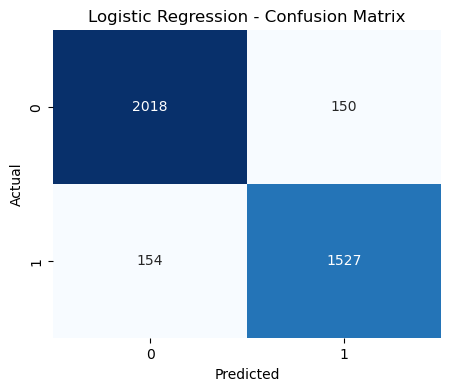

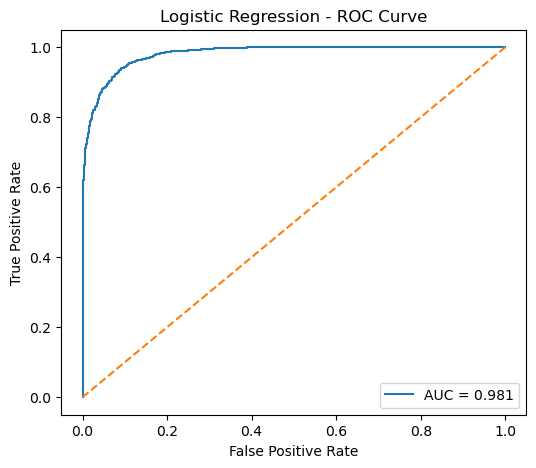

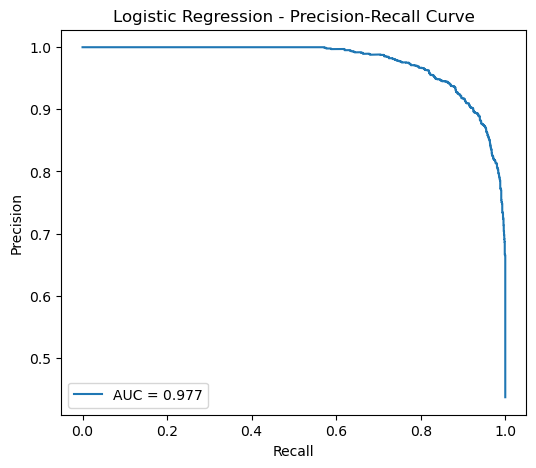


==== Decision Tree ====

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2168
           1       0.87      0.88      0.88      1681

    accuracy                           0.89      3849
   macro avg       0.89      0.89      0.89      3849
weighted avg       0.89      0.89      0.89      3849



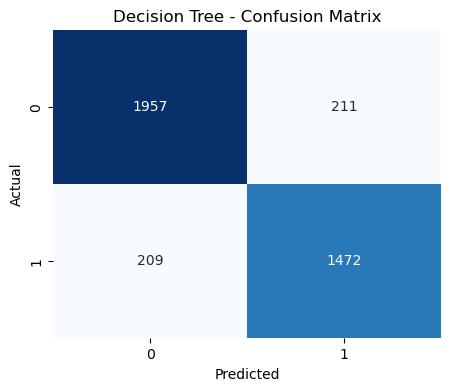

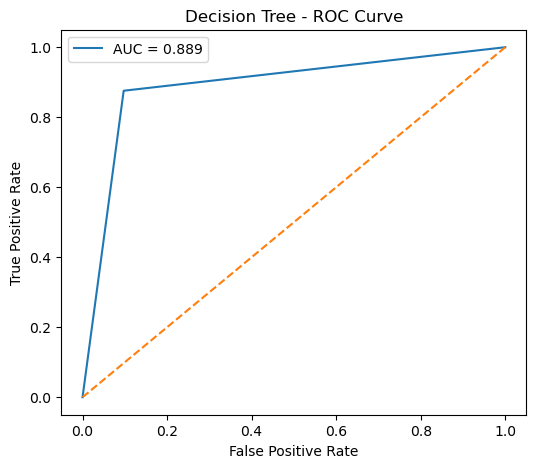

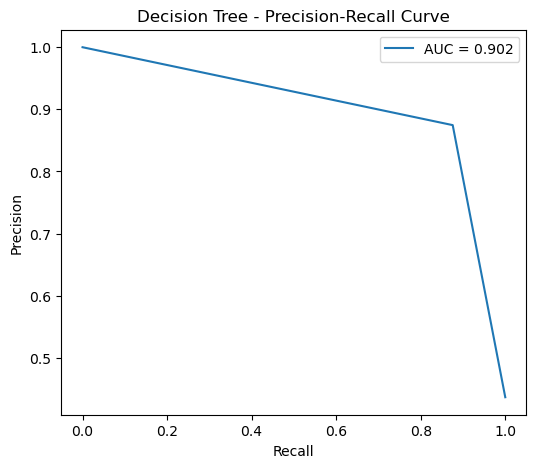


==== Random Forest ====

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2168
           1       0.91      0.90      0.90      1681

    accuracy                           0.92      3849
   macro avg       0.92      0.91      0.91      3849
weighted avg       0.92      0.92      0.92      3849



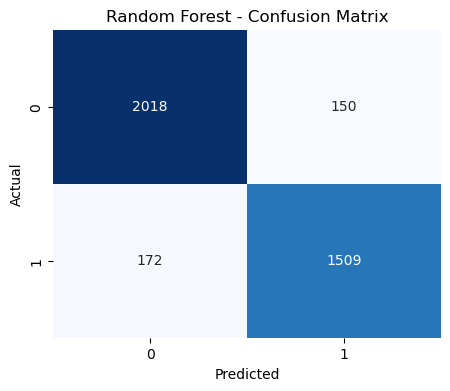

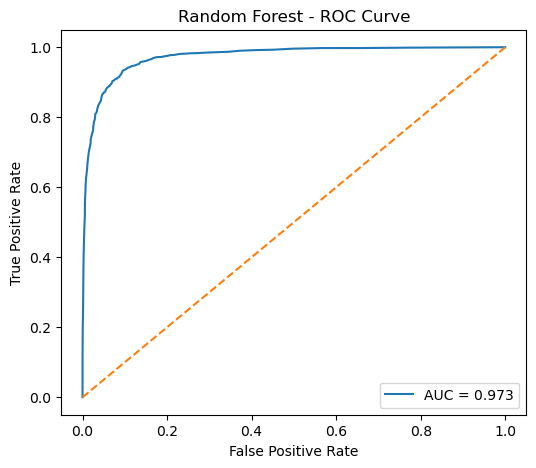

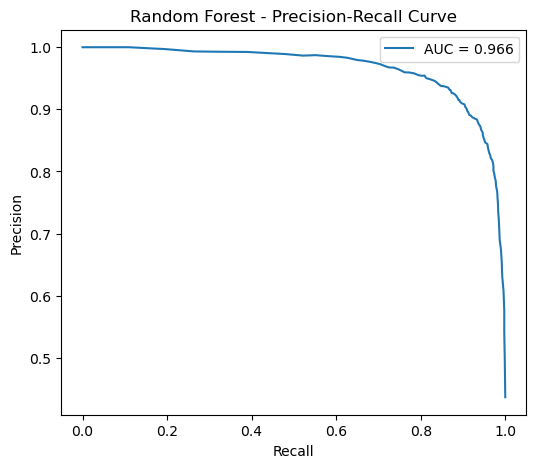

In [27]:
# Step 6: Model Evaluation
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate each model
for name, model in models.items():
    print(f"\n==== {name} ====")
    
    # Pipeline already wraps preprocessing + model
    clf = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", model)])
    clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None
    
    # 1. Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # 2. Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # 3. ROC Curve + AUC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = roc_auc_score(y_test, y_prob)
        
        plt.figure(figsize=(6,5))
        plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
        plt.plot([0,1], [0,1], linestyle="--")
        plt.title(f"{name} - ROC Curve")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.show()
        
        # 4. Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_test, y_prob)
        pr_auc = auc(recall, precision)
        
        plt.figure(figsize=(6,5))
        plt.plot(recall, precision, label=f"AUC = {pr_auc:.3f}")
        plt.title(f"{name} - Precision-Recall Curve")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.legend()
        plt.show()


## Step 7: Model Tuning

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Define parameter grids
tree_params = {
    "classifier__max_depth": [3, 5, 7, 10, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

rf_params = {
    "classifier__n_estimators": [50, 100, 200],
    "classifier__max_depth": [5, 10, 15, None],
    "classifier__min_samples_split": [2, 5, 10],
    "classifier__min_samples_leaf": [1, 2, 4]
}

# Create base pipelines
tree_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                            ("classifier", DecisionTreeClassifier(random_state=42))])

rf_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                          ("classifier", RandomForestClassifier(random_state=42))])

# GridSearchCV for Decision Tree (still feasible)
tree_grid = GridSearchCV(tree_pipe, tree_params,
                         cv=5, scoring="f1_weighted", n_jobs=-1, verbose=2)

tree_grid.fit(X_train, y_train)
print("Best Decision Tree Params:", tree_grid.best_params_)
print("Best Decision Tree CV F1:", tree_grid.best_score_)

# RandomizedSearchCV for Random Forest (faster than full grid)
rf_random = RandomizedSearchCV(
    rf_pipe,
    rf_params,
    n_iter=25,   # sample 25 random combos instead of all 108
    cv=5,
    scoring="f1_weighted",
    n_jobs=-1,
    random_state=42,
    verbose=2
)

rf_random.fit(X_train, y_train)
print("Best Random Forest Params:", rf_random.best_params_)
print("Best Random Forest CV F1:", rf_random.best_score_)

# Evaluate tuned models on test set
best_tree = tree_grid.best_estimator_
best_rf = rf_random.best_estimator_

for name, model in [("Tuned Decision Tree", best_tree), ("Tuned Random Forest", best_rf)]:
    y_pred = model.predict(X_test)
    print(f"\n{name} Test Classification Report:")
    print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Decision Tree Params: {'classifier__max_depth': 7, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2}
Best Decision Tree CV F1: 0.9164475702034178
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Random Forest Params: {'classifier__n_estimators': 200, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 4, 'classifier__max_depth': 15}
Best Random Forest CV F1: 0.9224221447120741

Tuned Decision Tree Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2168
           1       0.91      0.90      0.91      1681

    accuracy                           0.92      3849
   macro avg       0.92      0.92      0.92      3849
weighted avg       0.92      0.92      0.92      3849


Tuned Random Forest Test Classification Report:
              precision    recall  f1-score   support

           0      

## Step 8: Subgroup Fairness Evaluation


Subgroup Fairness Evaluation:
       Feature         Group  Support  Precision  Recall     F1
0       Gender          male     1877      0.915   0.899  0.907
1       Gender        female     1972      0.909   0.913  0.911
2    LunchType      standard     2499      0.918   0.919  0.918
3    LunchType  free/reduced     1350      0.887   0.843  0.864
4  EthnicGroup       group B      810      0.907   0.879  0.893
5  EthnicGroup       group D      997      0.897   0.921  0.909
6  EthnicGroup       group C     1215      0.895   0.883  0.889
7  EthnicGroup       group A      296      0.908   0.856  0.881
8  EthnicGroup       group E      531      0.959   0.948  0.954


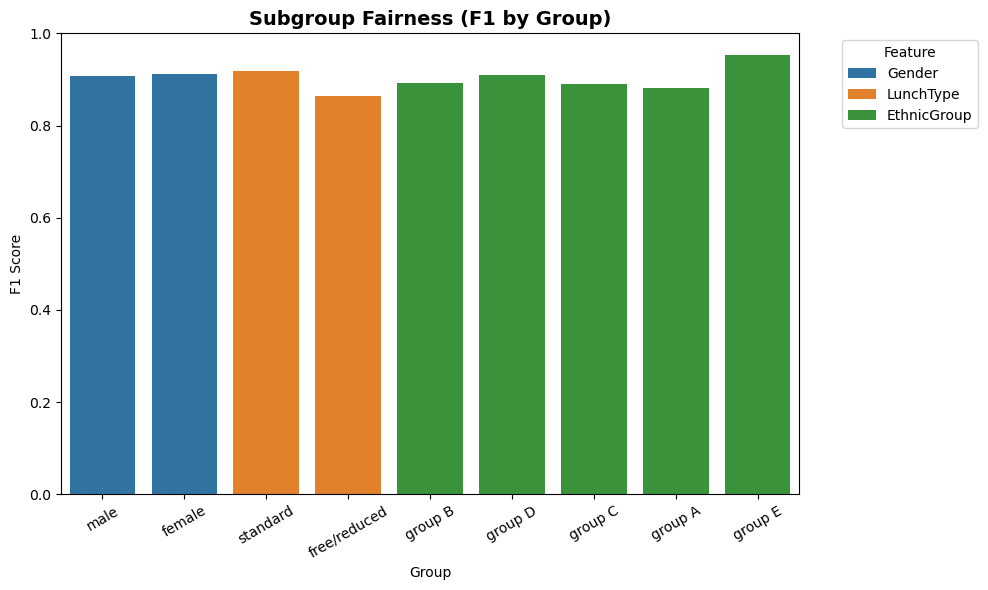

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use the best tuned Random Forest
best_model = best_rf  

# Predictions on test set
y_pred = best_model.predict(X_test)

# Columns to evaluate fairness on
subgroup_cols = ["Gender", "LunchType", "EthnicGroup"]

results = []

for col in subgroup_cols:
    for subgroup in X_test[col].unique():
        mask = X_test[col] == subgroup
        if mask.sum() == 0:
            continue
        precision = precision_score(y_test[mask], y_pred[mask])
        recall = recall_score(y_test[mask], y_pred[mask])
        f1 = f1_score(y_test[mask], y_pred[mask])
        
        results.append({
            "Feature": col,
            "Group": subgroup,
            "Support": mask.sum(),
            "Precision": round(precision, 3),
            "Recall": round(recall, 3),
            "F1": round(f1, 3)
        })

# Convert to DataFrame for better readability
fairness_df = pd.DataFrame(results)
print("\nSubgroup Fairness Evaluation:")
print(fairness_df)

# Refined visualization of subgroup F1 scores
plt.figure(figsize=(10,6))
sns.barplot(data=fairness_df, x="Group", y="F1", hue="Feature")

plt.title("Subgroup Fairness (F1 by Group)", fontsize=14, fontweight="bold")
plt.ylabel("F1 Score")
plt.xlabel("Group")
plt.xticks(rotation=30)
plt.ylim(0, 1)

# Move legend outside the plot
plt.legend(title="Feature", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## Step 9: Feature Importance & Interpretability

✅ Feature names count: 30

Top 10 Random Forest Feature Importances:
                Feature  Importance
1            TotalScore    0.753201
16          x3_standard    0.039543
15      x3_free/reduced    0.035806
3               x0_male    0.024629
2             x0_female    0.023333
8            x1_group E    0.019724
0            NrSiblings    0.013690
18              x4_none    0.006619
17         x4_completed    0.006410
14  x2_some high school    0.006288


<Figure size 1000x600 with 0 Axes>

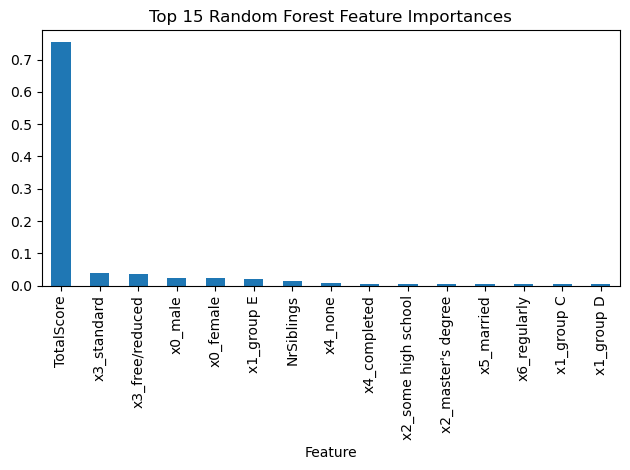

Permutation importance length: 16
Feature names length: 30

Top 10 Permutation Importances:
                 Feature    Importance
15       x3_free/reduced  3.720000e-01
0             NrSiblings  5.266667e-02
3                x0_male  1.000000e-02
6             x1_group C  2.220446e-17
10  x2_bachelor's degree  0.000000e+00
11        x2_high school  0.000000e+00
12    x2_master's degree  0.000000e+00
13       x2_some college  0.000000e+00
14   x2_some high school  0.000000e+00
4             x1_group A -6.666667e-04


<Figure size 1000x600 with 0 Axes>

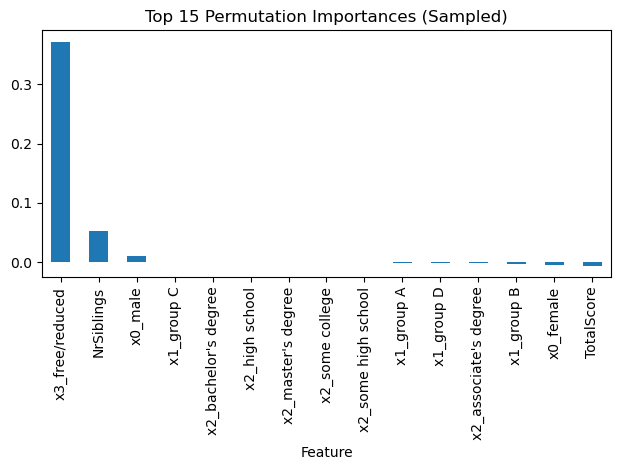


Generating SHAP summary plot (200 samples)...


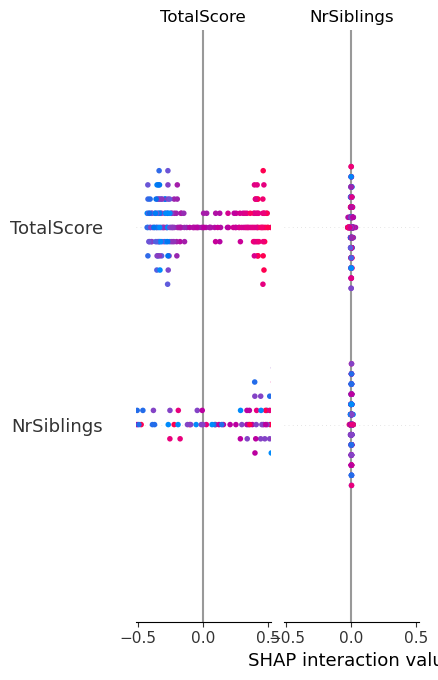

In [33]:
# ============================================================
# Step 9: Feature Importance (Debug + Fixed)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import permutation_importance

# 9.0 Extract Final Feature Names (directly from preprocessor)
preprocessor = best_model.named_steps["preprocessor"]

# Numeric features
feature_names_num = numeric_features

# One-hot categorical features
ohe = preprocessor.named_transformers_["cat"].named_steps["onehot"]
feature_names_cat = ohe.get_feature_names_out()

# Combine
all_feature_names = np.concatenate([feature_names_num, feature_names_cat])
print(f"✅ Feature names count: {len(all_feature_names)}")

# 9.1 Random Forest Native Importances
rf_importances = best_rf.named_steps["classifier"].feature_importances_

rf_df = pd.DataFrame({
    "Feature": all_feature_names,
    "Importance": rf_importances
}).sort_values("Importance", ascending=False)

print("\nTop 10 Random Forest Feature Importances:")
print(rf_df.head(10))

plt.figure(figsize=(10, 6))
rf_df.head(15).plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Top 15 Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# 9.2 Permutation Importance (smaller sample for speed)
X_test_sample = X_test.sample(n=300, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

perm_importance = permutation_importance(
    best_model, X_test_sample, y_test_sample,
    n_repeats=5, random_state=42, n_jobs=-1
)

# 🔎 Debug lengths
print(f"Permutation importance length: {len(perm_importance.importances_mean)}")
print(f"Feature names length: {len(all_feature_names)}")

# ✅ Align lengths (use min to avoid mismatch crash)
min_len = min(len(all_feature_names), len(perm_importance.importances_mean))

perm_df = pd.DataFrame({
    "Feature": all_feature_names[:min_len],
    "Importance": perm_importance.importances_mean[:min_len]
}).sort_values("Importance", ascending=False)

print("\nTop 10 Permutation Importances:")
print(perm_df.head(10))

plt.figure(figsize=(10, 6))
perm_df.head(15).plot(kind="bar", x="Feature", y="Importance", legend=False)
plt.title("Top 15 Permutation Importances (Sampled)")
plt.tight_layout()
plt.show()

# 9.3 SHAP Values (subset for speed)
explainer = shap.TreeExplainer(best_rf.named_steps["classifier"])

X_sample = preprocessor.transform(X_test_sample[:200])
shap_values = explainer.shap_values(X_sample)

print("\nGenerating SHAP summary plot (200 samples)...")
shap.summary_plot(shap_values, features=X_sample, feature_names=all_feature_names)


## Step 10: Model Evaluation & Metrics


✅ Final Test Accuracy: 0.9208

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2168
           1       0.91      0.91      0.91      1681

    accuracy                           0.92      3849
   macro avg       0.92      0.92      0.92      3849
weighted avg       0.92      0.92      0.92      3849



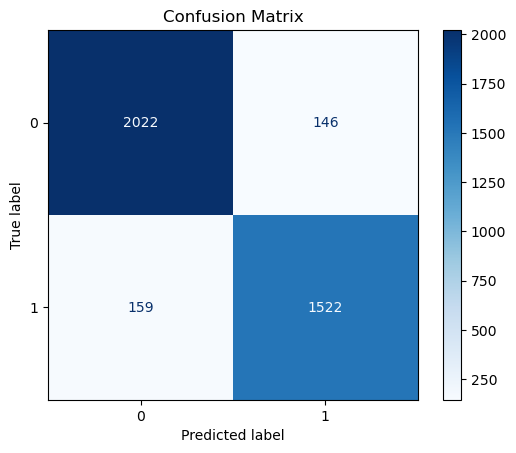

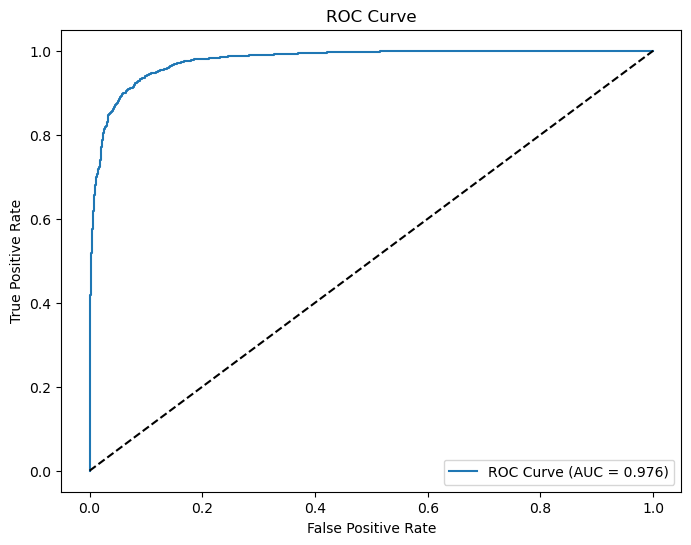

In [34]:
# ============================================================
# Step 10: Final Model Evaluation
# ============================================================

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# 10.1 Predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # needed for ROC-AUC

# 10.2 Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Final Test Accuracy: {acc:.4f}")

# 10.3 Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 10.4 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# 10.5 ROC-AUC Curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


## Step 11: Save the Best Model.

In [35]:
# =========================================
# 11. Save the Best Model
# =========================================
import joblib
import os

# Create a folder to store models if not exists
os.makedirs("models", exist_ok=True)

# Save the best Random Forest model pipeline
model_path = "models/best_rf_model.pkl"
joblib.dump(best_model, model_path)

print(f"✅ Model saved successfully at: {model_path}")


✅ Model saved successfully at: models/best_rf_model.pkl
